# Fund Separation Theorem and The Capital Market Line

### Capital Market Line

The efficent frontier dramtically changes shape when a risk-free asset is introduced. In a normal Markowitz efficient frontier we are trying to find the set of portfolios which have the greatest return for a given or target volatility. When ther are only risky assets we observe the curved shape we have seen previously. When we introduce a risk-free asset the amount of feasible portfolios increases. Any portfolio that lies on a straight line which goes from a risk-free asset to any risky portfolio is a feasible portfolio. These portfolios are essentially holdings of the risk-free asset in one hand and the risky portfolio in the other. What we want to do is increase the return to risk ratio given these new portfolios involving the risk-free asset. We can maximise the slope of the straight line till it is tangential with the efficient frontier, this gives us the tangency portfolio.

The straight line is called the capital market line and the tangency portfolio is also known as the maximum sharpe ratio (MSR) portfolio. The naximum slope of the capital line is the maximum sharpe ratio. Investors generally like to hold a risk-free asset and the MSR portfolio associated with that risk-free asset. This combination gives you the highest return per unit risk given all the assets. 

A special property of the maximum sharpe ratio portfolio is that is contains no exposure to unrewarded risks, only systematic risks. 

### Maximum Sharpe Ratio Portfolio 

The tangency portfolio is the portfolio that maximises the sharpe ratio and is given by the following equation:

$$ {SR}_p = \frac{\mu_p - r_f}{\sigma_p} = \frac{\sum_{i=1}^N w_i\mu_i - r_f}{\sqrt{\sum_{i,j=1}^Nw_iw_j\sigma_{ij}}}.$$

As an aside correlation between two assset is given by the covariance divided by the product of the volatilities

$$\rho_{ij} = \frac{\sigma_{ij}}{\sigma_i\sigma_j}.$$

# Lab Session - Locating the Max Sharpe Ratio Portfolio

In [22]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import scipy.stats

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ind = erk.get_ind_returns()
er = erk.annualise_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

In [9]:
def msr(riskfree_rate, er, cov):
    '''
    Risk-Free Rate -> W
    '''
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0), ) * n
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        '''
        Returns the negative of the sharpe ratio given weights
        '''
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    results = scipy.optimize.minimize(neg_sharpe_ratio, init_guess,
                        args = (riskfree_rate, er, cov, ), method = 'SLSQP',
                        options = {'disp': False},
                        constraints = (weights_sum_to_1),
                        bounds = bounds
                        )
    return results.x

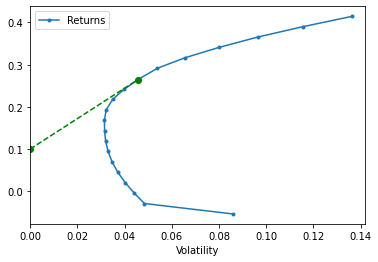

In [21]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)

rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)

# add capital market line
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color = 'green', marker = 'o', linestyle = 'dashed')

<AxesSubplot:xlabel='Volatility'>

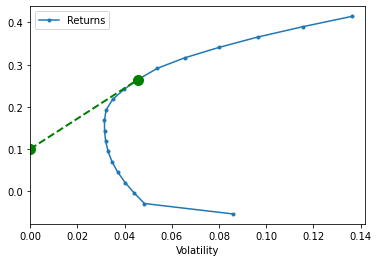

In [28]:
erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate = 0.1)